In [16]:
import nengo

period = 0.5

with nengo.Network() as model:
    osc = nengo.Network()
    osc.config[nengo.Ensemble].neuron_type = nengo.LIFRate()
    osc.config[nengo.Ensemble].seed = 0
    nengo.networks.Oscillator(0.1, 1/period, 300, net=osc)
    bump = nengo.Node(lambda t: 1 if t < 0.1 else 0)
    nengo.Connection(bump, osc.ensemble[0])
    
    p_osc = nengo.Probe(osc.ensemble, synapse=0.01)

In [17]:
with nengo.Simulator(model) as sim:
    sim.run(10)

Simulation finished in 0:00:02.                                                 


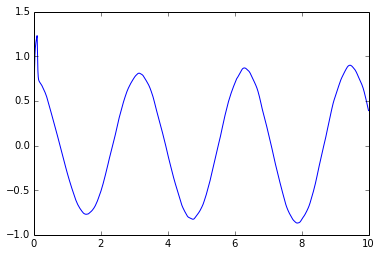

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sim.trange(), sim.data[p_osc][:, 0])

In [37]:
import numpy as np

dim = sim.data[p_osc][:, 0]

zos = sim.trange()[np.isclose(np.zeros(dim.shape), dim, atol=0.001)]
gain = np.mean(np.diff(zos)[2:]) / period
gain

3.1512000000000002

In [47]:
with nengo.Network() as new_model:
    osc = nengo.Network()
    osc.config[nengo.Ensemble].neuron_type = nengo.LIFRate()
    osc.config[nengo.Ensemble].seed = 0
    nengo.networks.Oscillator(0.1, gain*1/period, 300, net=osc)
    bump = nengo.Node(lambda t: 1 if t < 0.1 else 0)
    nengo.Connection(bump, osc.ensemble[0])
    
    p_osc = nengo.Probe(osc.ensemble, synapse=0.01)

In [48]:
with nengo.Simulator(new_model) as new_sim:
    new_sim.run(10)

Simulation finished in 0:00:02.                                                 


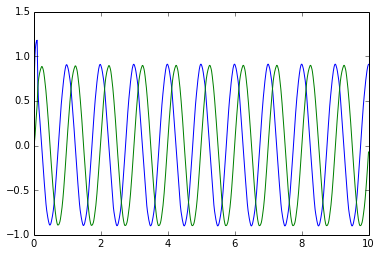

In [49]:
plt.plot(sim.trange(), new_sim.data[p_osc])